In [2]:
%matplotlib inline
import os
import time
import cv2
import tensorflow as tf
from tensorflow.keras import backend as K
from matplotlib import pyplot as plt
import numpy as np
from icnet import ICNET
import glob

In [3]:
tf.keras.backend.clear_session()

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)
K.set_session(sess)

In [4]:
width = 640
height = 320
num_classes = 3
weights_path = 'weights_drivable.h5'

In [5]:
model = ICNET(width, height, num_classes, weights_path=weights_path)

In [8]:
images_list = glob.glob('Images/*')
num_images = len(images_list)

Generated segmentations for 7 images in 0.2786722183227539 seconds -- 25.119116796539462 FPS


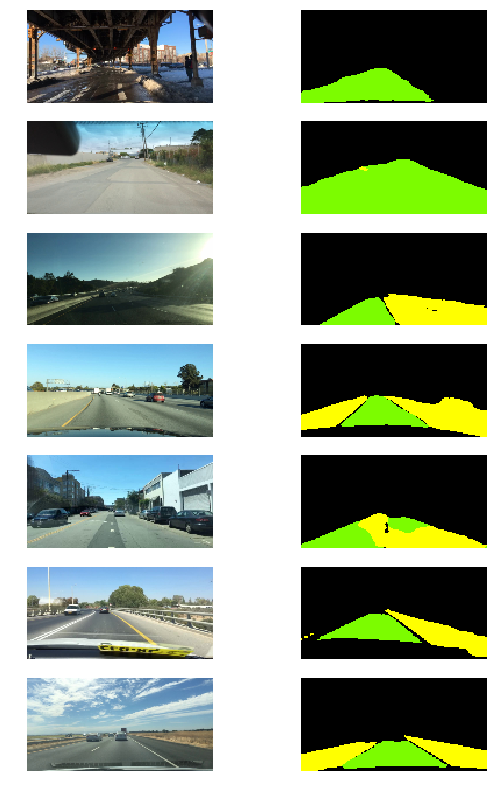

In [10]:
# Predict
start_time = time.time()

plt.figure(figsize=(9, 14))
# plt.figure()

for count, image_file in enumerate(images_list):

    # Load and resize image
    img = cv2.imread(image_file, 1)
    img = cv2.resize(img, (width, height))
    img_reshape = img.reshape(-1, *img.shape)

    pred = model.predict(img_reshape, batch_size=1)

    # Classes in image
    pred_img = np.argmax(pred[0], axis=-1)
    unique = np.unique(pred_img)

    # Prepare color image
    col_img = np.zeros((*pred_img.shape, 3), dtype=np.uint8)

    col_img[pred_img == 2] = [255, 255, 0]
    col_img[pred_img == 1] = [124, 252, 0]
    
    # Show images
    rgb = img[..., ::-1]
    rgb = cv2.resize(rgb, (col_img.shape[1], col_img.shape[0]))

    plt.subplot(num_images, 2, 2*count+1)
    plt.imshow(rgb)
    plt.axis('off')

    plt.subplot(num_images, 2, 2*count+2)
    plt.imshow(col_img)
    plt.axis('off')

duration = time.time() - start_time
print('Generated segmentations for %s images in %s seconds -- %s FPS' %
      (num_images, duration, num_images/duration))

plt.show()